In [390]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline

In [3]:
df1 = DataFrame({'key':['a','b','a','c','a','a','b'],'data1':range(7)})

In [4]:
df2 = DataFrame({'key':['a','b','d'],'data2':range(3)})

In [8]:
df1

,data1,key
0,0,a
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [9]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


#### pd.merge相当于sql内连接

In [12]:
pd.merge(df2,df1,on='key')

,data2,key,data1
0,0,a,0
1,0,a,2
2,0,a,4
3,0,a,5
4,1,b,1
5,1,b,6


In [13]:
df1 = DataFrame({'lkey':['a','b','a','c','a','a','b'],'data1':range(7)})
df2 = DataFrame({'rkey':['a','b','d'],'data2':range(3)})

In [17]:
pd.merge(df1,df2,left_on='lkey',right_on='rkey')

,data1,lkey,data2,rkey
0,0,a,0,a
1,2,a,0,a
2,4,a,0,a
3,5,a,0,a
4,1,b,1,b
5,6,b,1,b


In [21]:
pd.merge(df1,df2,left_on='lkey',right_on='rkey',how='left')

,data1,lkey,data2,rkey
0,0,a,0.0,a
1,1,b,1.0,b
2,2,a,0.0,a
3,3,c,NaN,NaN
4,4,a,0.0,a
5,5,a,0.0,a
6,6,b,1.0,b


In [22]:
left = DataFrame({'key1':['foo','foo','bar'],'key2':['one','two','one'],'lval':[1,2,3]})
right = DataFrame({'key1':['foo','foo','bar','bar'],'key2':['one','one','one','two'],'lval':[4,5,6,7]})

In [23]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [24]:
right

,key1,key2,lval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [33]:
pd.merge(left,right,on=['key1','key2'],how='left',suffixes=('_left','_right'),sort='key1')

,key1,key2,lval_left,lval_right
0,bar,one,3,6.0
1,foo,one,1,4.0
2,foo,one,1,5.0
3,foo,two,2,NaN


In [34]:
left2 = DataFrame([[1,2],[3,4],[5,6]],index=['a','c','e'],columns=['ohio','nevada'])

In [35]:
left2

,ohio,nevada
a,1,2
c,3,4
e,5,6


In [36]:
right2 = DataFrame([[7,8],[9,10],[11,12],[13,14]],index=['b','c','d','e'],columns=['missouri','alabama'])

In [37]:
right2

,missouri,alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [40]:
left2.join(right2,how='outer')

,ohio,nevada,missouri,alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [41]:
arr = np.arange(12).reshape(3,4)

In [42]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [44]:
np.concatenate([arr,arr],axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
np.concatenate([arr,arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11,  8,  9, 10, 11]])

In [47]:
s1 = Series([0,1],index=['a','b'])
s2 = Series([2,3,4],index=['c','d','e'])
s3 = Series([5,6],index=['f','g'])

In [48]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [49]:
pd.concat([s1,s2,s3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [50]:
s4 = pd.concat([s1*5,s3])

In [51]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [52]:
pd.concat([s1,s4])

a    0
b    1
a    0
b    5
f    5
g    6
dtype: int64

In [53]:
pd.concat([s1,s4],axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [54]:
pd.concat([s1,s4],axis=1,join='inner')

,0,1
a,0,0
b,1,5


In [59]:
pd.concat([s1,s4],axis=1,join_axes=[['a','b','c','f']])

,0,1
a,0.0,0.0
b,1.0,5.0
c,NaN,NaN
f,NaN,5.0


In [61]:
pd.concat([s1,s4],axis=0,keys=['s1','s4'])

s1  a    0
    b    1
s4  a    0
    b    5
    f    5
    g    6
dtype: int64

In [62]:
result = pd.concat([s1,s1,s3],keys=['one','two','three'])

In [63]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [69]:
result.unstack().unstack().unstack()

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [67]:
result.unique()

array([0, 1, 5, 6], dtype=int64)

In [70]:
result = pd.concat([s1,s1,s3],axis=1,keys=['one','two','three'])

In [72]:
result.unstack()

one    a    0.0
       b    1.0
       f    NaN
       g    NaN
two    a    0.0
       b    1.0
       f    NaN
       g    NaN
three  a    NaN
       b    NaN
       f    5.0
       g    6.0
dtype: float64

In [73]:
result

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [74]:
df1 = DataFrame(np.random.randn(3,4),columns=['a','b','c','d'])
df2 = DataFrame(np.random.randn(2,3),columns=['b','d','a'])

In [77]:
pd.concat([df1,df2],ignore_index=True)

,a,b,c,d
0,1.316933,0.333763,0.553400,1.097166
1,-1.650044,-1.638107,-0.652438,-0.064264
2,0.484781,-0.127937,-0.135833,0.052357
3,-0.932894,0.484154,NaN,1.052963
4,-0.277699,0.553604,NaN,1.011768


In [80]:
pd.concat([s1,s1],verify_integrity=True)

ValueError: Indexes have overlapping values: ['a', 'b']

In [2]:
a = Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],index=['f','e','d','c','b','a'])

In [4]:
b = Series(np.arange(len(a)),dtype=np.float64,index=['f','e','d','c','b','a'])

In [5]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [6]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [25]:
pd.concat([a,b],axis=1,keys=['a','b'])

,a,b
f,NaN,0.0
e,2.5,1.0
d,NaN,2.0
c,3.5,3.0
b,4.5,4.0
a,NaN,5.0


In [26]:
b[-1]=np.nan

In [27]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [28]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [31]:
Series(np.where(pd.isnull(a),b,a))

0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    NaN
dtype: float64

In [33]:
a.combine_first(b)

f    0.0
e    2.5
d    2.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [69]:
data = DataFrame(np.arange(6).reshape(2,3),index=pd.Index(['ohio','colorado'],name='state'),columns=pd.Index(['one','two','three'],name='number'))

In [59]:
data = DataFrame(np.arange(6).reshape(2,3),index=(['ohio','colorado']),columns=(['one','two','three']))

In [60]:
data.index.name='state'

In [61]:
data.columns.name='number'

In [63]:
%reset_selective data

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [67]:
%who

DataFrame	 Series	 a	 b	 data	 np	 pd	 


In [49]:
%magic

In [56]:
pd.Index(['ohio','colorado'],names='state')

Index(['ohio', 'colorado'], dtype='object')

In [70]:
data

number,one,two,three
state,,,
ohio,0,1,2
colorado,3,4,5


In [71]:
data.stack()

state     number
ohio      one       0
          two       1
          three     2
colorado  one       3
          two       4
          three     5
dtype: int32

In [77]:
data.stack().unstack().unstack().unstack()

state,ohio,colorado
number,,
one,0,3
two,1,4
three,2,5


In [78]:
data

number,one,two,three
state,,,
ohio,0,1,2
colorado,3,4,5


In [80]:
data.unstack().unstack(1)

state,ohio,colorado
number,,
one,0,3
two,1,4
three,2,5


In [81]:
result = data.stack()

In [83]:
df = DataFrame({'left':result,'right':result+5},columns=pd.Index(['left','right'],name='side'))

In [84]:
df

side             left  right
state    number             
ohio     one        0      5
         two        1      6
         three      2      7
colorado one        3      8
         two        4      9
         three      5     10

In [85]:
df.stack()

state     number  side 
ohio      one     left      0
                  right     5
          two     left      1
                  right     6
          three   left      2
                  right     7
colorado  one     left      3
                  right     8
          two     left      4
                  right     9
          three   left      5
                  right    10
dtype: int32

In [86]:
df.unstack(1)

side     left           right          
number    one two three   one two three
state                                  
ohio        0   1     2     5   6     7
colorado    3   4     5     8   9    10

In [116]:
ldata = pd.read_csv('pydata-book\examples\ldata.txt')

In [117]:
pivoted = ldata.pivot('date','item','value')

In [120]:
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 00:00:00,0.000,2710.349,5.800
1959-06-30 00:00:00,2.340,277.801,5.100
1959-09-30 00:00:00,2.740,2775.488,5.300
1959-12-31 00:00:00,2.513,2785.204,5.407
1960-03-31 00:00:00,2.456,2739.373,5.497


In [121]:
ldata['value2'] = np.random.randn(len(ldata))

In [122]:
ldata[:10]

,date,item,value,value2
0,1959-03-31 00:00:00,realgdp,2710.349,0.813898
1,1959-03-31 00:00:00,infl,0.000,0.724009
2,1959-03-31 00:00:00,unemp,5.800,0.496284
3,1959-06-30 00:00:00,realgdp,277.801,0.356746
4,1959-06-30 00:00:00,infl,2.340,0.599799
5,1959-06-30 00:00:00,unemp,5.100,-1.753789
6,1959-09-30 00:00:00,realgdp,2775.488,-0.430588
7,1959-09-30 00:00:00,infl,2.740,1.550805
8,1959-09-30 00:00:00,unemp,5.300,-1.016432
9,1959-12-31 00:00:00,realgdp,2785.204,0.156855


In [123]:
pivoted = ldata.pivot('date','item')

In [124]:
pivoted.head()

value                     value2                    
item                  infl   realgdp  unemp      infl   realgdp     unemp
date                                                                     
1959-03-31 00:00:00  0.000  2710.349  5.800  0.724009  0.813898  0.496284
1959-06-30 00:00:00  2.340   277.801  5.100  0.599799  0.356746 -1.753789
1959-09-30 00:00:00  2.740  2775.488  5.300  1.550805 -0.430588 -1.016432
1959-12-31 00:00:00  2.513  2785.204  5.407  0.690740  0.156855 -1.327408
1960-03-31 00:00:00  2.456  2739.373  5.497 -0.201187  0.147972 -0.048553

In [130]:
pivoted.columns.names=(['values','items'])

In [133]:
pivoted.head()

values               value                     value2                    
items                 infl   realgdp  unemp      infl   realgdp     unemp
date                                                                     
1959-03-31 00:00:00  0.000  2710.349  5.800  0.724009  0.813898  0.496284
1959-06-30 00:00:00  2.340   277.801  5.100  0.599799  0.356746 -1.753789
1959-09-30 00:00:00  2.740  2775.488  5.300  1.550805 -0.430588 -1.016432
1959-12-31 00:00:00  2.513  2785.204  5.407  0.690740  0.156855 -1.327408
1960-03-31 00:00:00  2.456  2739.373  5.497 -0.201187  0.147972 -0.048553

In [135]:
pivoted['value'][:10]

items,infl,realgdp,unemp
date,,,
1959-03-31 00:00:00,0.000,2710.349,5.800
1959-06-30 00:00:00,2.340,277.801,5.100
1959-09-30 00:00:00,2.740,2775.488,5.300
1959-12-31 00:00:00,2.513,2785.204,5.407
1960-03-31 00:00:00,2.456,2739.373,5.497
1960-06-30 00:00:00,2.140,2729.370,5.217
1960-09-30 00:00:00,2.016,2745.509,5.510
1960-12-31 00:00:00,2.155,2718.240,5.034
1961-03-31 00:00:00,2.105,2766.603,5.074


In [136]:
ldata.head()

,date,item,value,value2
0,1959-03-31 00:00:00,realgdp,2710.349,0.813898
1,1959-03-31 00:00:00,infl,0.000,0.724009
2,1959-03-31 00:00:00,unemp,5.800,0.496284
3,1959-06-30 00:00:00,realgdp,277.801,0.356746
4,1959-06-30 00:00:00,infl,2.340,0.599799


In [137]:
data = ({'k1':['one']*3+['two']*4,'k2':[1,1,2,3,3,4,4]})

In [138]:
data

{'k1': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
 'k2': [1, 1, 2, 3, 3, 4, 4]}

In [140]:
data = DataFrame(data)

In [141]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [145]:
data[data.duplicated()]

,k1,k2
1,one,1
4,two,3
6,two,4


In [146]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [147]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [148]:
data['v1']=range(len(data))

In [149]:
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [150]:
data.drop_duplicates('k1')

,k1,k2,v1
0,one,1,0
3,two,3,3


In [156]:
data.drop_duplicates(['k1'],keep='last')

,k1,k2,v1
2,one,2,2
6,two,4,6


In [212]:
data = DataFrame({'food':['bacon','pulled pork','bacon','pastrami','corned beef','bacon','pastrami','honey ham','nova lox'],'ounces':[4,3,12,6,7.5,8,3,5,6]})

In [213]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [208]:
meat_to_animal = {'bacon':'pig','pulled pock':'pig','pastrami':'cow','corned beef':'cow','honey_ham':'pig','nova lox':'salmon'}

In [214]:
meat_to_animal

{'bacon': 'pig',
 'pulled pock': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey_ham': 'pig',
 'nova lox': 'salmon'}

In [215]:
meat_to_animal_s = Series(meat_to_animal)

In [216]:
meat_to_animal_s

bacon             pig
corned beef       cow
honey_ham         pig
nova lox       salmon
pastrami          cow
pulled pock       pig
dtype: object

In [196]:
type(data)

pandas.core.frame.DataFrame

In [197]:
type(meat_to_animal_s)

pandas.core.series.Series

In [220]:
pd.merge(data,meat_to_animal_s.to_frame(),left_on='food',right_index=True,how='left').rename(columns={0:'animal'})

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,NaN
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,NaN
8,nova lox,6.0,salmon


In [188]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

In [189]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,NaN
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,NaN
8,nova lox,6.0,salmon


In [241]:
data = Series([1,-999,2,-999,-1000,3])

In [244]:
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [243]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [245]:
data = DataFrame(np.arange(12).reshape(3,4),index=['ohio','colorado','new york'],columns=['one','two','three','four'])

In [246]:
data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [247]:
data.rename(index=str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [249]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]

In [250]:
ages

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [251]:
bins = [18,25,35,60,100]

In [252]:
cats = pd.cut(ages,bins)

In [253]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [256]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [264]:
cats.get_values()

array([Interval(18, 25, closed='right'), Interval(18, 25, closed='right'),
       Interval(18, 25, closed='right'), Interval(25, 35, closed='right'),
       Interval(18, 25, closed='right'), Interval(18, 25, closed='right'),
       Interval(35, 60, closed='right'), Interval(25, 35, closed='right'),
       Interval(60, 100, closed='right'),
       Interval(35, 60, closed='right'), Interval(35, 60, closed='right'),
       Interval(25, 35, closed='right')], dtype=object)

In [265]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [266]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [268]:
pd.cut(ages,[18,26,36,61,100],right=False,labels=['youth','youngadult','middleaged','senior'])

[youth, youth, youth, youngadult, youth, ..., youngadult, senior, middleaged, middleaged, youngadult]
Length: 12
Categories (4, object): [youth < youngadult < middleaged < senior]

In [269]:
data = np.random.rand(20)

In [270]:
data

array([4.83707586e-01, 8.50376788e-01, 6.26928778e-01, 4.25315731e-01,
       7.22389509e-01, 7.73276776e-01, 6.24809520e-01, 5.41198667e-01,
       7.65532249e-02, 4.14992837e-01, 9.47311840e-01, 7.06956542e-01,
       2.32847105e-02, 5.42234720e-01, 6.05176411e-04, 9.63481072e-01,
       9.58807600e-02, 9.75313920e-02, 6.91471877e-01, 3.20603887e-01])

In [290]:
pd.cut(data,4)

[(-1.826, 0.0349], (-1.826, 0.0349], (0.0349, 1.896], (-1.826, 0.0349], (0.0349, 1.896], ..., (-1.826, 0.0349], (-1.826, 0.0349], (-1.826, 0.0349], (-1.826, 0.0349], (0.0349, 1.896]]
Length: 10000
Categories (4, interval[float64]): [(-3.695, -1.826] < (-1.826, 0.0349] < (0.0349, 1.896] < (1.896, 3.757]]

In [281]:
data = np.random.randn(10000)

In [288]:
pd.qcut(data,4)

[(-0.671, 0.00246], (-0.671, 0.00246], (0.00246, 0.682], (-0.671, 0.00246], (0.00246, 0.682], ..., (-0.671, 0.00246], (-3.6879999999999997, -0.671], (-3.6879999999999997, -0.671], (0.00246, 0.682], (0.682, 3.757]]
Length: 10000
Categories (4, interval[float64]): [(-3.6879999999999997, -0.671] < (-0.671, 0.00246] < (0.00246, 0.682] < (0.682, 3.757]]

In [306]:
np.random.seed(12345)

In [307]:
data = DataFrame(np.random.randn(1000,4))

In [308]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.248944,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [309]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [319]:
data[(np.abs(data[0]) > 3)]

,0,1,2,3
523,-3.428254,-0.296336,-0.439938,-0.867165
900,3.366626,-2.372214,0.851010,1.332846


In [320]:
df = DataFrame(np.arange(20).reshape(5,4))

In [321]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [326]:
sampler = np.random.permutation(5)

In [327]:
sampler

array([1, 3, 0, 2, 4])

In [328]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19


In [330]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [331]:
df = DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})

In [332]:
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [335]:
dummies = pd.get_dummies(df['key'],prefix='key')

In [339]:
df_with_dummy = pd.merge(df,dummies,left_index=True,right_index=True,how='left')

In [340]:
df_with_dummy

,data1,key,key_a,key_b,key_c
0,0,b,0,1,0
1,1,b,0,1,0
2,2,a,1,0,0
3,3,c,0,0,1
4,4,a,1,0,0
5,5,b,0,1,0


In [341]:
df_with_dummy1 = pd.merge(df['data1'].to_frame(),dummies,left_index=True,right_index=True,how='left')

In [342]:
df_with_dummy1

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [343]:
mnames = ['moive_id','title','genres']

In [344]:
mnames

['moive_id', 'title', 'genres']

In [351]:
movies = pd.read_table('pydata-book/datasets/movielens/movies.dat',sep='::',header=None,names=mnames)

c:\python36\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [392]:
movies.head()

,moive_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [403]:
genre_iter = (set(x.split('|')) for x in movies.genres)

In [383]:
gener_iter

<generator object <genexpr> at 0x000000000FF0BDB0>

In [404]:
genres = set.union(*genre_iter)

In [406]:
genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [418]:
dummies = DataFrame(np.zeros((len(movies),len(genres))),columns=genres)

In [423]:
dummies.head()

,Drama,Children's,Adventure,Comedy,Thriller,Romance,Action,Documentary,Mystery,War,Musical,Western,Fantasy,Crime,Film-Noir,Animation,Horror,Sci-Fi
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [422]:
for i,gen in enumerate(movies.genres):
    dummies.loc[i,gen.split('|')]=1

In [430]:
movies_windic = movies.join(dummies.add_prefix('genre_'))

In [431]:
movies_windic.head()

,moive_id,title,genres,genre_Drama,genre_Children's,genre_Adventure,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,...,genre_Mystery,genre_War,genre_Musical,genre_Western,genre_Fantasy,genre_Crime,genre_Film-Noir,genre_Animation,genre_Horror,genre_Sci-Fi
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [436]:
movies_windic.loc[0]

moive_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
genre_Drama                                    0
genre_Children's                               1
genre_Adventure                                0
genre_Comedy                                   1
genre_Thriller                                 0
genre_Romance                                  0
genre_Action                                   0
genre_Documentary                              0
genre_Mystery                                  0
genre_War                                      0
genre_Musical                                  0
genre_Western                                  0
genre_Fantasy                                  0
genre_Crime                                    0
genre_Film-Noir                                0
genre_Animation                                1
genre_Horror                                   0
genre_Sci-Fi        

In [437]:
values = np.random.rand(10)

In [438]:
values

array([0.18098787, 0.40906107, 0.52889758, 0.66405796, 0.90322866,
       0.52520189, 0.75603383, 0.90830844, 0.96588737, 0.17373658])

In [439]:
bins = [0,0.2,0.4,0.6,0.8,1]

In [440]:
pd.get_dummies(pd.cut(values,bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [441]:
import re

In [442]:
text = "foo bar\t baz \tqux"

In [443]:
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [451]:
regex = re.compile('\s+')

In [452]:
regex

re.compile(r'\s+', re.UNICODE)

In [453]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [454]:
regex.findall(text)

[' ', '\t ', ' \t']

In [455]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [456]:
data

{'Dave': 'dave@google.com',
 'Steve': 'steve@gmail.com',
 'Rob': 'rob@gmail.com',
 'Wes': nan}

In [457]:
data = Series(data)

In [458]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [464]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [465]:
import json

In [467]:
l = ['iplaypython',[1,2,3], {'name':'xiaoming'}] 

In [469]:
json.dumps(l)

'["iplaypython", [1, 2, 3], {"name": "xiaoming"}]'

In [470]:
db = json.load(open('pydata-book/datasets/usda_food/database.json'))

In [472]:
len(db)

6636

In [479]:
DataFrame(db)[:5]

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'value': 5.2, 'units': 'g', 'description': '...","[{'amount': 1, 'unit': 'cup, crumbled', 'grams...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'value': 3.27, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]


In [476]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [515]:
info = DataFrame(db,columns=['description','group','id','manufacturer']).rename(columns={'description':'food','group':'fgroup'},copy=False)

In [517]:
info[:3]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,


In [485]:
pd.value_counts(nutrients.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [493]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [497]:
nutrients = pd.concat(nutrients,ignore_index=True)

In [500]:
nutrients.duplicated().sum()

14179

In [501]:
nutrients = nutrients.drop_duplicates()

In [521]:
nutrients = nutrients.rename(columns={'description':'nutrients','group':'nutgroup'},copy=False)

In [522]:
nutrients.head()

,nutrients,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [523]:
ndata = pd.merge(info,nutrients,how='left')

In [524]:
ndata.head()

,food,fgroup,id,manufacturer,nutrients,nutgroup,units,value
0,"Cheese, caraway",Dairy and Egg Products,1008,,Protein,Composition,g,25.18
1,"Cheese, caraway",Dairy and Egg Products,1008,,Total lipid (fat),Composition,g,29.20
2,"Cheese, caraway",Dairy and Egg Products,1008,,"Carbohydrate, by difference",Composition,g,3.06
3,"Cheese, caraway",Dairy and Egg Products,1008,,Ash,Other,g,3.28
4,"Cheese, caraway",Dairy and Egg Products,1008,,Energy,Energy,kcal,376.00


In [525]:
ndata.loc[1000]

food            Milk, producer, fluid, 3.7% milkfat
fgroup                       Dairy and Egg Products
id                                             1078
manufacturer                                       
nutrients                             Aspartic acid
nutgroup                                Amino Acids
units                                             g
value                                         0.249
Name: 1000, dtype: object

In [530]:
results = ndata.groupby(['nutrients','fgroup'])['value'].quantile(0.5)

In [534]:
type(results['Zinc, Zn'])

pandas.core.series.Series

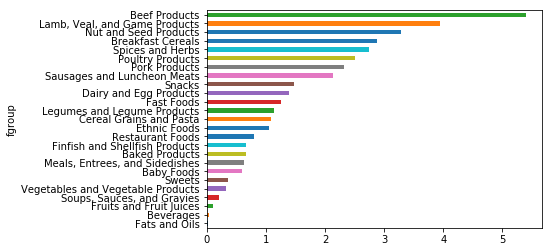

In [540]:
results['Zinc, Zn'].sort_values(ascending=True).plot(kind='barh')

In [541]:
t = ndata.groupby(['nutrients','fgroup'])

In [544]:
list(t)[0]

(('Adjusted Protein', 'Sweets'),
                                           food  fgroup     id manufacturer  \
 197743  Baking chocolate, unsweetened, squares  Sweets  19078                
 
                nutrients     nutgroup units  value  
 197743  Adjusted Protein  Composition     g   12.9  )

In [546]:
by_nutrient = ndata.groupby(['nutgroup','nutrients'])

In [551]:
list(by_nutrient)[:1]

[(('Amino Acids', 'Alanine'),
                                                       food  \
  48                                        Cheese, caraway   
  127                                       Cheese, cheddar   
  198                                          Cheese, edam   
  269                                          Cheese, feta   
  340                    Cheese, mozzarella, part skim milk   
  416      Cheese, mozzarella, part skim milk, low moisture   
  487                                        Cheese, romano   
  541                                     Cheese, roquefort   
  613     Cheese spread, pasteurized process, american, ...   
  686                           Cream, fluid, half and half   
  757     Sour dressing, non-butterfat, cultured, filled...   
  812     Milk, filled, fluid, with blend of hydrogenate...   
  867     Cream substitute, liquid, with lauric acid oil...   
  943                            Cream substitute, powdered   
  999                   M

In [558]:
get_maxinum = lambda x:x.loc[x.value.idxmax()]

In [559]:
by_nutrient.apply(get_maxinum)

food  \
nutgroup    nutrients                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened   
            Arginine                                             Seeds, sesame flour, low-fat   
            Aspartic acid                                                 Soy protein isolate   
            Cystine                              Seeds, cottonseed flour, low fat (glandless)   
            Glutamic acid                                                 Soy protein isolate   
            Glycine                                         Gelatins, dry powder, unsweetened   
            Histidine                              Whale, beluga, meat, dried (Alaska Native)   
            Hydroxyproline                  KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...   
            Isoleucine                      Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
            Leucine                         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
            Lysine                          Seal, bearded (Oogruk), meat, dried (Alaska Na...   
            Methionine                                  Fish, cod, Atlantic, dried and salted   
            Phenylalanine                   Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
            Proline                                         Gelatins, dry powder, unsweetened   
            Serine                          Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
            Threonine                       Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
            Tryptophan                       Sea lion, Steller, meat with fat (Alaska Native)   
            Tyrosine                        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
            Valine                          Soy protein isolate, PROTEIN TECHNOLOGIES INTE...   
Composition Adjusted Protein                           Baking chocolate, unsweetened, squares   
            Carbohydrate, by difference           Sweeteners, tabletop, fructose, dry, powder   
            Fiber, total dietary                                             Corn bran, crude   
            Protein                         Soy protein isolate, potassium type, crude pro...   
            Sugars, total                                                  Sugars, granulated   
            Total lipid (fat)                                                 Oil, wheat germ   
            Water                                               Water, bottled, POLAND SPRING   
Elements    Calcium, Ca                     Leavening agents, baking powder, double-acting...   
            Copper, Cu                      Veal, variety meats and by-products, liver, co...   
            Fluoride, F                     Tea, instant, sweetened with sugar, lemon-flav...   
            Iron, Fe                            Salad dressing, russian dressing, low calorie   
...                                                                                       ...   
Vitamins    Cryptoxanthin, beta                                               Spices, paprika   
            Dihydrophylloquinone            Margarine, 80% fat, stick, includes regular an...   
            Folate, DFE                            Cereals ready-to-eat, QUAKER, CAP'N CRUNCH   
            Folate, food                         Leavening agents, yeast, baker's, active dry   
            Folate, total                        Leavening agents, yeast, baker's, active dry   
            Folic acid                             Cereals ready-to-eat, QUAKER, CAP'N CRUNCH   
            Lutein + zeaxanthin                                                     Kale, raw   
            Lycopene                                                            Tomato powder   
            Menaquinone-4                   Chicken, broilers or fryers, drumstick, meat a...   
            Nia